In [16]:
import sys
from mxnet import autograd, nd

In [17]:
num_inputs = 2
num_examples = 1000
true_w =[2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))

print(features)
print(features[:, 0])

labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale = 0.01, shape=(num_examples))
print(labels)


[[ 1.4642214  -1.3058136 ]
 [ 0.9344402   0.5380863 ]
 [-0.16038011  0.84187603]
 ...
 [-1.2386242  -1.1405991 ]
 [ 0.3152031   0.542503  ]
 [-0.31289306 -0.52202225]]
<NDArray 1000x2 @cpu(0)>

[ 1.46422136e+00  9.34440196e-01 -1.60380110e-01 -1.00553632e+00
 -4.35898900e-01  1.43718672e+00 -1.62824914e-01  1.61066961e+00
  1.38954297e-01  2.14447007e-01  1.08741835e-01 -1.86104977e+00
 -6.76830113e-01  6.42819345e-01 -1.00341849e-02 -1.95189178e-01
 -3.57204378e-01 -1.30963266e+00  2.00367212e+00  7.88396955e-01
  2.64668226e-01  2.71192193e-01  3.20269376e-01 -1.23966467e+00
  1.27925527e+00 -1.63486207e+00 -9.85714793e-01  1.96916258e+00
  3.54684085e-01  1.77993250e+00 -5.28613091e-01 -1.88574538e-01
  2.25449252e+00  2.48906210e-01  2.61260509e-01  2.00847173e+00
 -5.59656739e-01 -7.94411525e-02 -5.72037458e-01  3.27630341e-01
  8.97934511e-02 -1.16832209e+00  1.72410369e+00  4.50734675e-01
 -9.03863490e-01  5.59072614e-01  2.06210256e-01 -5.35201542e-02
  2.02170229e+00 -1.51527

In [18]:
features[0], labels[0]

(
 [ 1.4642214 -1.3058136]
 <NDArray 2 @cpu(0)>, 
 [11.562276]
 <NDArray 1 @cpu(0)>)

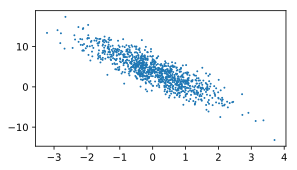

In [19]:
from matplotlib import pyplot as plt
from IPython import display

def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(4.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

In [20]:
import random
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函数根据索引返回对应元素
a = nd.array([[1,2,3], [4,5,6], [7,8,9]])
c = a.take(nd.array([0,1]))
print(c)


[[1. 2. 3.]
 [4. 5. 6.]]
<NDArray 2x3 @cpu(0)>


In [21]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    print(X[:])
    break
    


[[ 0.40012604 -0.51328397]
 [ 0.9286574   1.4826274 ]
 [ 0.07628381  1.0538037 ]
 [-0.62382996 -0.5371404 ]
 [ 0.32292974 -1.3210319 ]
 [-0.5066414  -1.4610924 ]
 [-1.2442741  -2.1389115 ]
 [-1.3105803  -0.37164024]
 [ 1.5590136   0.67002654]
 [ 0.2498796   0.7556889 ]]
<NDArray 10x2 @cpu(0)> 
[6.7282147 1.0105993 0.77978   4.768324  9.338767  8.154379  8.992264
 2.835815  5.0424476 2.1225798]
<NDArray 10 @cpu(0)>

[[ 0.40012604 -0.51328397]
 [ 0.9286574   1.4826274 ]
 [ 0.07628381  1.0538037 ]
 [-0.62382996 -0.5371404 ]
 [ 0.32292974 -1.3210319 ]
 [-0.5066414  -1.4610924 ]
 [-1.2442741  -2.1389115 ]
 [-1.3105803  -0.37164024]
 [ 1.5590136   0.67002654]
 [ 0.2498796   0.7556889 ]]
<NDArray 10x2 @cpu(0)>


## 1. Define model

In [22]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

## 2. Define loss function

In [44]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2/2

## 3. Define Optimization algo

In [61]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr*param.grad / batch_size #param[:] 表示解引用， 修改引用的那个object, 若改成param，则下面error不会收敛，因为w引用的object不会变，而param指向了新的object
        

## 4. MAIN

In [63]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))
w, b
w.attach_grad()
b.attach_grad()

lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss  

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
            l.backward()
        sgd([w,b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.054415
epoch 2, loss 0.000246
epoch 3, loss 0.000050
epoch 4, loss 0.000049
epoch 5, loss 0.000049


In [64]:
true_w, w

([2, -3.4], 
 [[ 2.00067  ]
  [-3.3999734]]
 <NDArray 2x1 @cpu(0)>)

In [65]:
true_b, b

(4.2, 
 [4.199492]
 <NDArray 1 @cpu(0)>)